In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud
import nltk
nltk.download(["stopwords",
               "punkt",
               "wordnet",
               "omw-1.4",
               "vader_lexicon"
               ])
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.probability import FreqDist

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Exploratory Data Analysis

In [2]:
# Load the Dataset

rev = pd.read_csv("chatgpt_reviews.csv")

In [3]:
# Explore rev

rev.head(10)

,date,title,review,rating
0,2023-05-21 16:42:24,Much more accessible for blind users than the ...,Up to this point I’ve mostly been using ChatGP...,4
1,2023-07-11 12:24:19,"Much anticipated, wasn’t let down.",I’ve been a user since it’s initial roll out a...,4
2,2023-05-19 10:16:22,"Almost 5 stars, but… no search function",This app would almost be perfect if it wasn’t ...,4
3,2023-05-27 21:57:27,"4.5 stars, here’s why","I recently downloaded the app and overall, it'...",4
4,2023-06-09 07:49:36,"Good, but Siri support would take it to the ne...",I appreciate the devs implementing Siri suppor...,4
5,2023-05-31 10:20:48,App review,"No doubt, this technology is absolutely life-c...",1
6,2023-06-23 08:10:54,Almost perfect except for…,Please provide a TABLET experience on iPad wit...,3
7,2023-07-04 19:02:08,"Chat GPT: The Underrated Buddy in Your Pocket""","Chat GPT is seriously underrated, dude! I mean...",4
8,2023-05-18 21:10:34,Nice and quick!,"On this app, as opposed to on the website, it ...",5
9,2023-06-15 15:39:10,The app of all apps for AI,There’s been times of apps touting they are ch...,5


In [4]:
# Explore rev

rev.tail(10)

,date,title,review,rating
2282,2023-05-19 04:37:46,Helps with life,Honestly this helps me in school and work. I u...,5
2283,2023-05-19 03:14:14,Incredibly bad login procedure,Because they don’t provide a opportunity to si...,1
2284,2023-05-19 03:04:45,100% MUST USE,ChatGPT has help me with my homework so much. ...,5
2285,2023-05-19 01:05:32,Less features than the web version,There are less features than the web version o...,5
2286,2023-05-19 00:17:15,"website version, include MidJourney","come to https://www.chatchat.bio, for free tri...",5
2287,2023-05-19 00:17:04,Andrew Justino Wilson 5/19/23,This has to be a beginning to something crazy ...,5
2288,2023-05-18 19:13:28,Superb AI,I’ve been using chat and have been a proud pre...,5
2289,2023-05-18 18:27:04,Fantastic App with Room for Enhancements,The ChatGPT iOS app is an outstanding product....,5
2290,2023-05-18 17:17:44,"Awesome technology, deplorable tactics",Sam Altman’s blatant attempt at regulatory cap...,2
2291,2023-07-25 00:50:20,I like how there r no limits thanks <33,.,5


In [5]:
# Explore rev

rev.describe()

,rating
count,2292.000000
mean,3.629581
std,1.625113
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


In [6]:
# Explore rev

rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2292 entries, 0 to 2291
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2292 non-null   object
 1   title   2292 non-null   object
 2   review  2292 non-null   object
 3   rating  2292 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 71.8+ KB


In [7]:
# Explore rev

rev.shape

(2292, 4)

In [8]:
# Check for Missing Values

rev.isnull().sum()

date      0
title     0
review    0
rating    0
dtype: int64

# Sentiment Extraction

In [9]:
# Model Dataset with VADER

senti = SentimentIntensityAnalyzer()

In [10]:
# Extract Values from Dictionary and Create New Columns in rev

rev["compound"] = [senti.polarity_scores(review)["compound"] for review in rev["review"]]
rev["neg"] = [senti.polarity_scores(review)["neg"] for review in rev["review"]]
rev["neu"] = [senti.polarity_scores(review)["neu"] for review in rev["review"]]
rev["pos"] = [senti.polarity_scores(review)["pos"] for review in rev["review"]]

In [11]:
# Explore rev

rev

,date,title,review,rating,compound,neg,neu,pos
0,2023-05-21 16:42:24,Much more accessible for blind users than the ...,Up to this point I’ve mostly been using ChatGP...,4,0.9967,0.018,0.741,0.241
1,2023-07-11 12:24:19,"Much anticipated, wasn’t let down.",I’ve been a user since it’s initial roll out a...,4,0.9915,0.018,0.828,0.154
2,2023-05-19 10:16:22,"Almost 5 stars, but… no search function",This app would almost be perfect if it wasn’t ...,4,0.9655,0.000,0.924,0.076
3,2023-05-27 21:57:27,"4.5 stars, here’s why","I recently downloaded the app and overall, it'...",4,0.9917,0.011,0.793,0.195
4,2023-06-09 07:49:36,"Good, but Siri support would take it to the ne...",I appreciate the devs implementing Siri suppor...,4,0.8497,0.016,0.902,0.082
...,...,...,...,...,...,...,...,...
2287,2023-05-19 00:17:04,Andrew Justino Wilson 5/19/23,This has to be a beginning to something crazy ...,5,0.2960,0.069,0.829,0.103
2288,2023-05-18 19:13:28,Superb AI,I’ve been using chat and have been a proud pre...,5,0.8882,0.047,0.686,0.267
2289,2023-05-18 18:27:04,Fantastic App with Room for Enhancements,The ChatGPT iOS app is an outstanding product....,5,0.9864,0.000,0.818,0.182
2290,2023-05-18 17:17:44,"Awesome technology, deplorable tactics",Sam Altman’s blatant attempt at regulatory cap...,2,0.2732,0.000,0.932,0.068


In [12]:
# Explore Newly Added Columns in rev

rev[["compound", "neg", "neu", "pos"]].describe()

,compound,neg,neu,pos
count,2292.000000,2292.000000,2292.000000,2292.000000
mean,0.306215,0.043239,0.778375,0.171399
std,0.468112,0.098619,0.218734,0.204616
min,-0.995200,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.686750,0.000000
50%,0.318200,0.000000,0.809000,0.123500
75%,0.734500,0.049000,1.000000,0.255000
max,0.999300,1.000000,1.000000,1.000000


<Axes: xlabel='compound', ylabel='Count'>

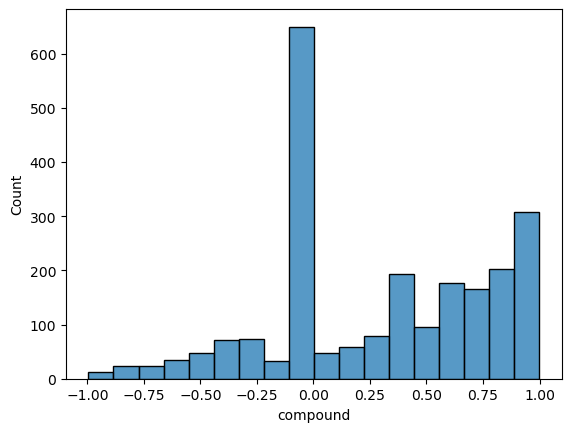

In [13]:
# Compound Distribution

sns.histplot(rev.compound)

<Axes: xlabel='neu', ylabel='Count'>

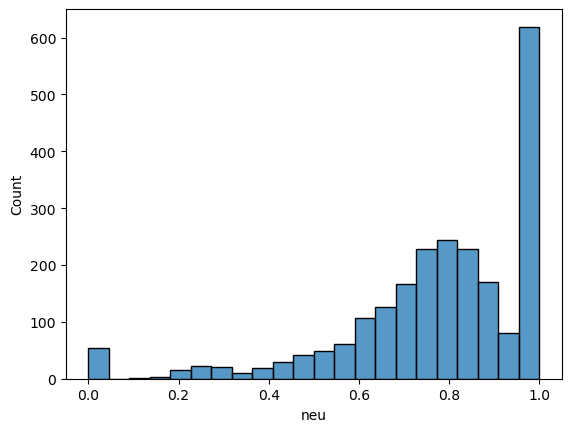

In [14]:
# Neutral Distribution

sns.histplot(rev.neu)

<Axes: xlabel='neg', ylabel='Count'>

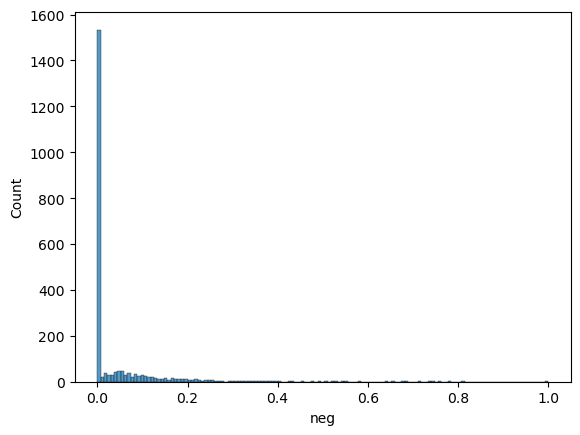

In [15]:
# Negative Distribution

sns.histplot(rev.neg)

<Axes: xlabel='pos', ylabel='Count'>

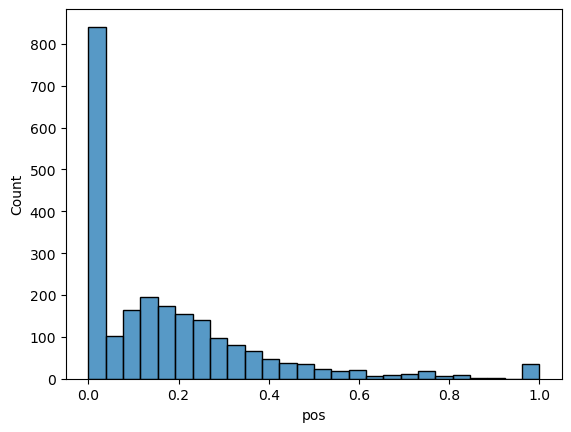

In [16]:
# Positive Distribution

sns.histplot(rev.pos)

# Preprocessing and Sentiment Analysis

In [17]:
# Define pre-processor

stop_words = nltk.corpus.stopwords.words("english")

def preprocessor(text):
    tokenized_text = nltk.tokenize.RegexpTokenizer("[a-zA-Z0-9\']+").tokenize(text) 
    cleaned_tokens = [word.lower() for word in tokenized_text if word.lower() not in stop_words] 
    lemmatized_text = [nltk.stem.WordNetLemmatizer().lemmatize(word) for word in cleaned_tokens]
    return lemmatized_text

In [18]:
# Process rev for WordCloud Visualisation

rev["rev_pro"] = rev["review"].apply(preprocessor)

rev.rev_pro

0       [point, mostly, using, chatgpt, window, deskto...
1       [user, since, initial, roll, waiting, mobile, ...
2       [app, would, almost, perfect, one, little, thi...
3       [recently, downloaded, app, overall, great, pl...
4       [appreciate, devs, implementing, siri, support...
                              ...                        
2287    [beginning, something, crazy, letting, know, s...
2288    [using, chat, proud, premium, subscriber, awhi...
2289    [chatgpt, io, app, outstanding, product, seaml...
2290    [sam, altman, blatant, attempt, regulatory, ca...
2291                                                   []
Name: rev_pro, Length: 2292, dtype: object

In [19]:
# View Negative Compounds

negcom = rev[rev["compound"] <= 0]

negcom

,date,title,review,rating,compound,neg,neu,pos,rev_pro
12,2023-05-25 14:25:42,Can’t use on iPad,I installed this on my iPhone and it works gre...,2,-0.9522,0.112,0.846,0.042,"[installed, iphone, work, great, already, usin..."
19,2023-05-18 21:52:14,The other sources weren’t giving responsible r...,I act as a learning coach for my child who goe...,5,-0.4226,0.063,0.893,0.044,"[act, learning, coach, child, go, school, onli..."
22,2023-07-12 03:10:58,Great AI to use!,Though there is a problem that I had found mys...,4,-0.4678,0.052,0.929,0.019,"[though, problem, found, email, subscription, ..."
41,2023-05-19 07:15:39,Overheating Issue and Lack of Privacy Settings...,I've had a troubling experience with this app....,1,-0.1655,0.082,0.860,0.059,"[i've, troubling, experience, app, downloading..."
54,2023-07-23 21:13:57,Desktop is much better,I’m not exactly sure why the app and the deskt...,2,-0.9231,0.113,0.858,0.029,"[exactly, sure, app, desktop, version, much, d..."
...,...,...,...,...,...,...,...,...,...
2278,2023-05-19 09:16:48,coooooooooooool,coooooooooooool,5,0.0000,0.000,1.000,0.000,[coooooooooooool]
2279,2023-05-19 11:24:05,Dumpster Fire Accout Verification!,Had a working account previously before app an...,1,-0.6448,0.129,0.769,0.102,"[working, account, previously, app, want, info..."
2281,2023-05-19 05:33:29,Having bug causing enormous thermal dissipation,Having bug causing enormous thermal dissipation,3,0.0000,0.000,1.000,0.000,"[bug, causing, enormous, thermal, dissipation]"
2285,2023-05-19 01:05:32,Less features than the web version,There are less features than the web version o...,5,-0.7488,0.072,0.909,0.019,"[le, feature, web, version, chatgpt, review, s..."


In [20]:
# View Positive Compounds

poscom = rev[rev["compound"] > 0]

poscom

,date,title,review,rating,compound,neg,neu,pos,rev_pro
0,2023-05-21 16:42:24,Much more accessible for blind users than the ...,Up to this point I’ve mostly been using ChatGP...,4,0.9967,0.018,0.741,0.241,"[point, mostly, using, chatgpt, window, deskto..."
1,2023-07-11 12:24:19,"Much anticipated, wasn’t let down.",I’ve been a user since it’s initial roll out a...,4,0.9915,0.018,0.828,0.154,"[user, since, initial, roll, waiting, mobile, ..."
2,2023-05-19 10:16:22,"Almost 5 stars, but… no search function",This app would almost be perfect if it wasn’t ...,4,0.9655,0.000,0.924,0.076,"[app, would, almost, perfect, one, little, thi..."
3,2023-05-27 21:57:27,"4.5 stars, here’s why","I recently downloaded the app and overall, it'...",4,0.9917,0.011,0.793,0.195,"[recently, downloaded, app, overall, great, pl..."
4,2023-06-09 07:49:36,"Good, but Siri support would take it to the ne...",I appreciate the devs implementing Siri suppor...,4,0.8497,0.016,0.902,0.082,"[appreciate, devs, implementing, siri, support..."
...,...,...,...,...,...,...,...,...,...
2286,2023-05-19 00:17:15,"website version, include MidJourney","come to https://www.chatchat.bio, for free tri...",5,0.7430,0.000,0.636,0.364,"[come, http, www, chatchat, bio, free, trial, ..."
2287,2023-05-19 00:17:04,Andrew Justino Wilson 5/19/23,This has to be a beginning to something crazy ...,5,0.2960,0.069,0.829,0.103,"[beginning, something, crazy, letting, know, s..."
2288,2023-05-18 19:13:28,Superb AI,I’ve been using chat and have been a proud pre...,5,0.8882,0.047,0.686,0.267,"[using, chat, proud, premium, subscriber, awhi..."
2289,2023-05-18 18:27:04,Fantastic App with Room for Enhancements,The ChatGPT iOS app is an outstanding product....,5,0.9864,0.000,0.818,0.182,"[chatgpt, io, app, outstanding, product, seaml..."


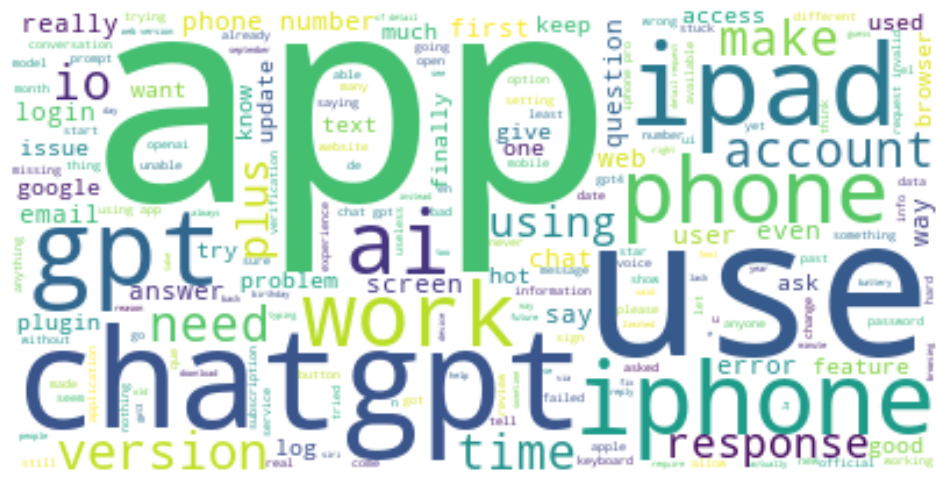

In [21]:
# WordCloud of Negative Reviews

neg_tokens = [word for review in negcom["rev_pro"] for word in review]

wordcloud = WordCloud(background_color = "white").generate_from_text(" ".join(neg_tokens))

# Display Generated Image

plt.figure(figsize = (12,12))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

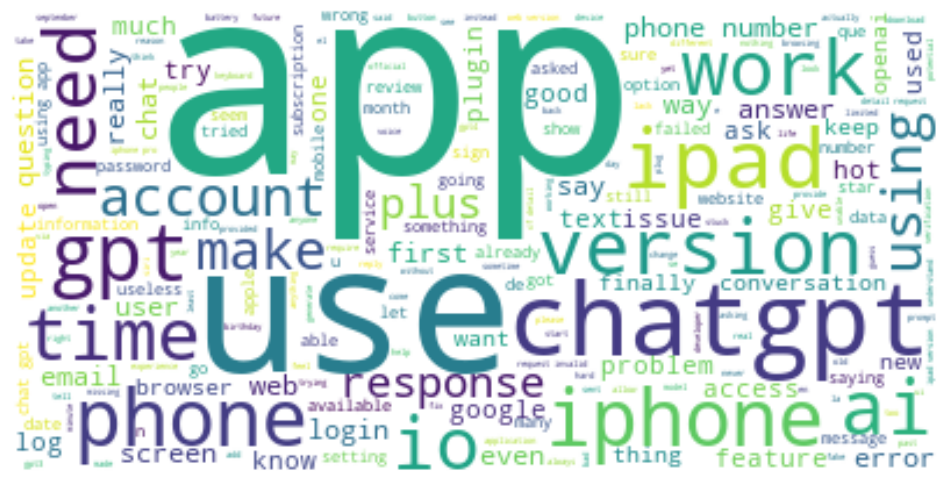

In [22]:
# WordCloud of Positive Reviews

pos_tokens = [word for review in poscom["rev_pro"] for word in review]

wordcloud = WordCloud(background_color = "white").generate_from_text(" ".join(neg_tokens))

# Display Generated Image

plt.figure(figsize = (12,12))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [23]:
# View Word Frequency for Negative Tokens

neg_dist = FreqDist(neg_tokens)

neg_dist.tabulate(10)

    app     use chatgpt   phone     get     gpt    ipad version  iphone account 
    335     104      95      89      76      71      70      67      64      57 


In [24]:
# View Word Frequency for Positive Tokens

pos_dist = FreqDist(pos_tokens)

pos_dist.tabulate(10)

     app  chatgpt       ai     user     like      use    would     chat response    great 
    1283      610      334      332      328      251      247      238      201      193 


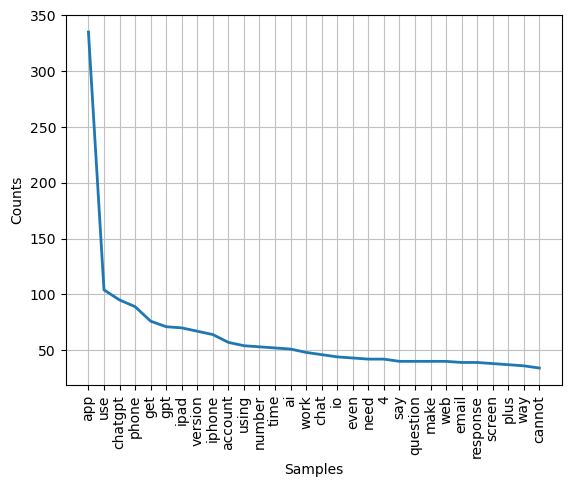

<Axes: xlabel='Samples', ylabel='Counts'>

In [25]:
# Visualise Word Frequency Plot for Negative Tokens

neg_dist.plot(30)

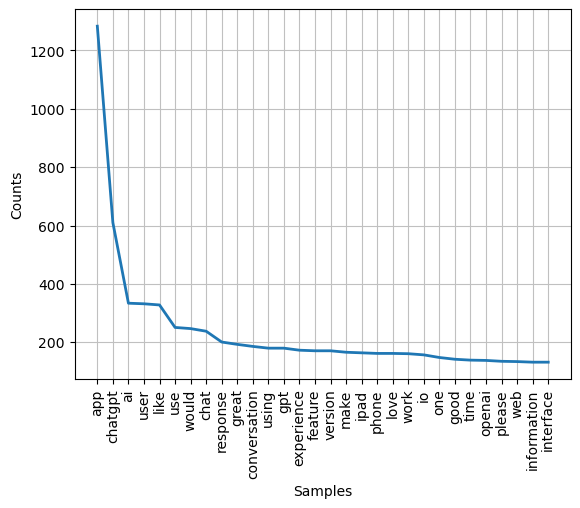

<Axes: xlabel='Samples', ylabel='Counts'>

In [26]:
# Visualise Word Frequency Plot for Negative Tokens

pos_dist.plot(30)